In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
book_reviews_pd = pd.read_csv("final.csv")
data = book_reviews_pd['clean_summary']

In [58]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)

# print(tf_idf_vectorizor)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [60]:
genre = book_reviews_pd['clean_categories']

tf_idf_vectorizor_g = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)

# print(tf_idf_vectorizor_g)

tf_idf_g = tf_idf_vectorizor_g.fit_transform(genre)
tf_idf_norm_g = normalize(tf_idf_g)
tf_idf_array_g = tf_idf_norm_g.toarray()

In [16]:
print(tf_idf_array_g)

[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.70710678 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [36]:
print(tf_idf_array_g[3])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [26]:
print(tf_idf_array_g[96])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [27]:
print(tf_idf_array_g[98])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [29]:
print(tf_idf_array_g[15])

[0.         0.         0.70710678 0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [37]:
print(genre)

0                    religion
1     biography autobiography
2                     history
3                     fiction
4                   education
               ...           
95                      humor
96                    fiction
97                    history
98                    fiction
99                electronics
Name: clean_categories, Length: 100, dtype: object


In [22]:
print(tf_idf_array_g[1])

[0.         0.         0.70710678 0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [61]:
comb_arr = []
for i in range(len(tf_idf_array)):
    # print(len(tf_idf_array[i]))
    # index = [item for item in enumerate(tf_idf_array_g[i]) if item>0]
    index = next((i for i, x in enumerate(tf_idf_array_g[i]) if x), None)
    # item = tf_idf_array_g[i].index()
    comb_arr.append([sum(tf_idf_array[i]), index])

In [54]:
print(type(comb_arr))

<class 'list'>


In [14]:
print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'lloyd')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [63]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [26]:
print(dfs[0])

   features     score
0      year  0.032809
1       man  0.028312
2      love  0.027149
3     story  0.026749
4      life  0.025161
5       old  0.024596
6     young  0.023478
7     death  0.021527
8     world  0.021109
9     tells  0.019796
10      new  0.019071
11   carter  0.018090
12     tale  0.017899
13     know  0.017232
14     book  0.016633


In [27]:
print(type(dfs[0]))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(tf_idf_array[:, 1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.22974441 0.         0.         0.        ]


In [70]:
comb_arr = []
lenny = len(tf_idf_array)
for i in range(lenny):
    # print(len(tf_idf_array[i]))
    # index = [item for item in enumerate(tf_idf_array_g[i]) if item>0]
    index = next((i for i, x in enumerate(tf_idf_array_g[i]) if x), None)
    summy = sum(tf_idf_array[i])
    # item = tf_idf_array_g[i].index()
    comb_arr.append([summy, index*summy/lenny])

In [71]:
comb_np = np.array(comb_arr)

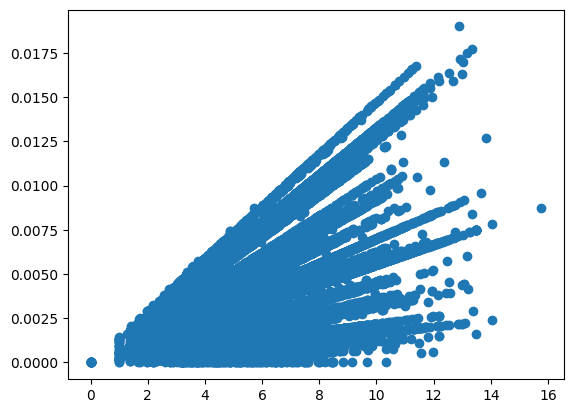

In [72]:
plt.scatter(comb_np[:, 0], comb_np[:, 1])
# plt.title(f"{file}")
plt.show()

In [53]:
print(comb_arr[:, 0])

TypeError: list indices must be integers or slices, not tuple

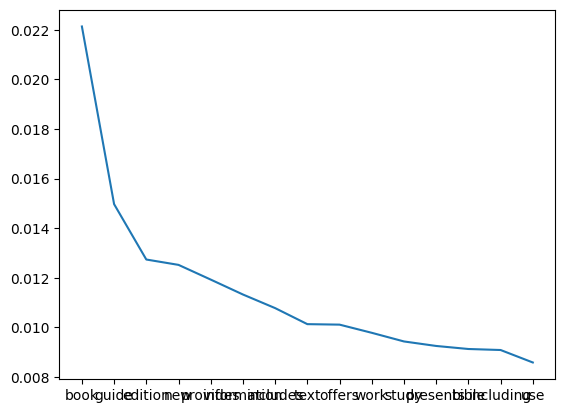

In [73]:
# fig, axs = plt.subplots(3)
# fig.suptitle('Graphs')
plt.plot(dfs[0]['features'], dfs[0]['score'])
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Method')
plt.show()

In [ ]:
comb_arr = []
lenny = len(tf_idf_array)
for i in range(lenny):
    for j in range(lenny):
        comb_arr.append(tf_idf_array_g[j], tf_idf_array[i])
    # print(len(tf_idf_array[i]))
    # index = [item for item in enumerate(tf_idf_array_g[i]) if item>0]
    # index = next((i for i, x in enumerate(tf_idf_array_g[i]) if x), None)
    # summy = sum(tf_idf_array[i])
    # # item = tf_idf_array_g[i].index()
    # comb_arr.append([summy, index*summy/lenny])